In [19]:
import re
import matplotlib.pyplot as plt


def get_train_acc(log_file):
    train_acc_list = []
    log = open(log_file,'r')
    for line in log.readlines():
        match = re.findall('rain_acc \d+.\d+', line)
        if match:
            train_acc = match[0].split(' ')[1]
            train_acc_list.append(float(train_acc))
        
    return train_acc_list

def get_valid_acc(log_file):
    valid_acc_list = []
    log = open(log_file,'r')
    for line in log.readlines():
        match = re.findall('alid_acc.? \d+.\d+', line)
        if match:
            valid_acc = match[0].split(' ')[1]
            valid_acc_list.append(float(valid_acc))
        
    return valid_acc_list

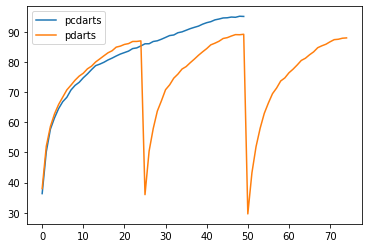

In [27]:
pcdarts_search = get_train_acc('./PC-DARTS/begin_unroll/log.txt')
pdarts_search = get_train_acc('./PDARTS/begin_unroll/log.txt')

plt.plot(pcdarts_search, label='pcdarts')
plt.plot(pdarts_search, label='pdarts')

plt.legend()

96.66

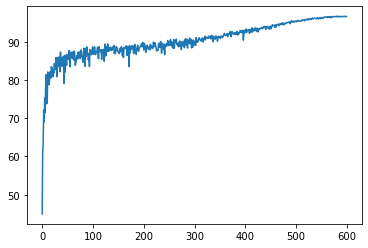

In [32]:
pdarts_train = get_valid_acc('./PDARTS/begin/log.txt')
plt.plot(pdarts_train, label='pdarts')
max(pdarts_train)

96.27

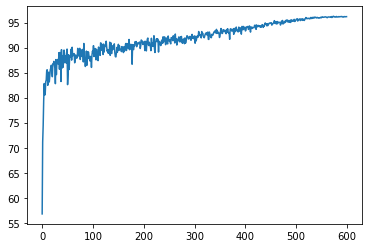

In [33]:
pcdarts_train = get_valid_acc('./PC-DARTS/begin/log.txt')
plt.plot(pcdarts_train, label='pcdarts')
max(pcdarts_train)

In [34]:
geno_file = 'PDARTS/genotypes.py'
geno = open(geno_file, 'r')

genotypes = []
for line in geno.readlines():
    match = re.findall('.* = Genotype\(normal=.*\)', line)
    if match:
        arch = match[0].split(' = ')
        arch_name, arch_type = arch[0], arch[1]
        arch_type = re.findall(r'\(\'(\w*)\'', arch_type)
        arch_type = {e:arch_type.count(e) for e in arch_type}
        genotypes.append((arch_name, arch_type))
        
genotypes

[('DARTS_V1',
  {'sep_conv_3x3': 5,
   'skip_connect': 6,
   'max_pool_3x3': 4,
   'avg_pool_3x3': 1}),
 ('DARTS_V2',
  {'sep_conv_3x3': 5,
   'skip_connect': 5,
   'dil_conv_3x3': 1,
   'max_pool_3x3': 5}),
 ('PDARTS',
  {'skip_connect': 2,
   'dil_conv_3x3': 3,
   'sep_conv_3x3': 5,
   'dil_conv_5x5': 3,
   'avg_pool_3x3': 1,
   'sep_conv_5x5': 1,
   'max_pool_3x3': 1}),
 ('begin_unroll',
  {'sep_conv_3x3': 7,
   'dil_conv_3x3': 1,
   'max_pool_3x3': 3,
   'skip_connect': 2,
   'avg_pool_3x3': 1,
   'sep_conv_5x5': 2})]

In [35]:
geno_file = 'PC-DARTS/genotypes.py'
geno = open(geno_file, 'r')

genotypes = []
for line in geno.readlines():
    match = re.findall('.* = Genotype\(normal=.*\)', line)
    if match:
        arch = match[0].split(' = ')
        arch_name, arch_type = arch[0], arch[1]
        arch_type = re.findall(r'\(\'(\w*)\'', arch_type)
        arch_type = {e:arch_type.count(e) for e in arch_type}
        genotypes.append((arch_name, arch_type))
        
genotypes

[('DARTS_V1',
  {'sep_conv_3x3': 5,
   'skip_connect': 6,
   'max_pool_3x3': 4,
   'avg_pool_3x3': 1}),
 ('DARTS_V2',
  {'sep_conv_3x3': 5,
   'skip_connect': 5,
   'dil_conv_3x3': 1,
   'max_pool_3x3': 5}),
 ('PC_DARTS_cifar',
  {'sep_conv_3x3': 7,
   'skip_connect': 1,
   'dil_conv_3x3': 2,
   'sep_conv_5x5': 4,
   'avg_pool_3x3': 1,
   'max_pool_3x3': 1}),
 ('PC_DARTS_image',
  {'skip_connect': 3,
   'sep_conv_3x3': 9,
   'dil_conv_5x5': 2,
   'max_pool_3x3': 1,
   'sep_conv_5x5': 1}),
 ('begin_unroll',
  {'skip_connect': 3,
   'sep_conv_3x3': 7,
   'max_pool_3x3': 2,
   'dil_conv_5x5': 2,
   'sep_conv_5x5': 2})]

In [37]:
s = 'false'
if s:
    print('true')

true
